<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Gradient_Boosting_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np #linear algebra library of Python
import pandas as pd # build on top of numpy for data analysis, data manipulation and data visualization
import matplotlib.pyplot as plt #plotting library of Python

Now let's mount Google drive so that we can upload the diabetes.csv file. You can find the code in the 'Code snippets' tab of Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


First thing that we do is take a look at the shape of the dataframe (df.shape) and take a look at first 5 lines through df.head()

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard.csv') #import file from Google Drive and create a pandas dataframe df
df.head() #shows first 5 lines including column namesdf.shape # number of rows and columns of dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df.shape

(284807, 31)

Let's create numpy arrays, one for the features (X) and one for the label (y)



In [0]:
X=df.drop('Class', 1).values #drop 'Outcome' column but you keep the index column
y=df['Class'].values

In [0]:
from sklearn.model_selection import train_test_split #method to split training and testing data sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [0]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=70bfba326fdd716f995dcd90ef79dea9f0c3a10f66c82e7e3d9bc6c32b14837b
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import bayes_opt
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [0]:
pbounds = {'n_estimators': (50, 1000), 'eta': (0.01, 3), 'max_depth': (1,32), 'gamma':(0,5), 'min_child_weight': (2,20), 'subsample':(0.5,1), 'colsample_bytree':(0.5,1)}
model_tuning = XGBClassifier(n_jobs=-1)

def xgboostcv(eta, n_estimators, max_depth, gamma, min_child_weight, subsample, colsample_bytree):
    return np.mean(cross_val_score(model_tuning, X_train, y_train, cv=5, scoring='accuracy'))
  
optimizer = BayesianOptimization(
    f=xgboostcv,
    pbounds=pbounds,
    random_state=1)  

optimizer.maximize(
    init_points=2,
    n_iter=3)
print(optimizer.max)

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.9995   |  0.7085   |  2.164    |  0.000571 |  10.37    |  4.642    |  137.7    |  0.5931   |
|  2        |  0.9995   |  0.6728   |  1.196    |  2.694    |  14.0     |  14.33    |  244.2    |  0.9391   |
|  3        |  0.9995   |  0.824    |  1.385    |  1.402    |  9.156    |  2.095    |  999.8    |  0.8966   |
|  4        |  0.9995   |  0.51     |  1.916    |  1.044    |  31.53    |  19.96    |  998.3    |  0.5124   |
|  5        |  0.9995   |  0.609    |  1.018    |  1.902    |  31.91    |  16.89    |  50.26    |  0.5056   |
{'target': 0.9994689377938618, 'params': {'colsample_bytree': 0.7085110023512871, 'eta': 2.1637702353920525, 'gamma': 0.0005718740867244332, 'max_depth': 10.372309751587032, 'min_child_weight': 4.641606034708035, 'n_estimators': 1

In [0]:
model = XGBClassifier(eta=2, n_estimators=138, max_depth=10, min_child_weight=5, gamma=0, subsample=0.6, colsample_bytree=0.7 )
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=2, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=138, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

0.9753836220757295


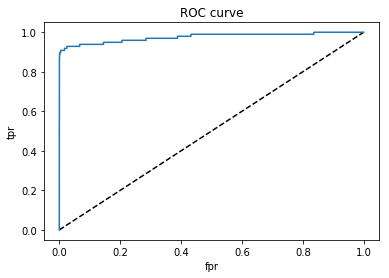

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)
print(roc_auc_score(y_test, y_pred_proba)) # ROC score

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()